## July 27 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
# df = pd.read_feather('D:/big-datasets/internship-telkom/eda-tiket-no-missing.ftr')

In [4]:
df = pd.read_feather('D:/big-datasets/internship-telkom/tiket_internet_Jan_June_2021.ftr')

In [5]:
df

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
0,2021-06-19 12:30:31,2021-06-19 15:54:44,IN101933857,Tidak Bisa Browsing - 2P / 3P Mati Total,[/ardiansyah/] 2/3P mati total [A_INTERNET][DCS],0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,NUNUKAN,47,6,INETR3M3,3M,Residensial,5.0
1,2021-05-24 14:32:10,None,IN99840378,Tidak Bisa Browsing - Tidak Bisa Koneksi,[/Arlianasari/] Tidak bisa browsing [A_INTERNE...,1,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,BALIKPAPAN,45,6,INETF10M,10M,Prime Cluster,28.0
2,2021-04-04 11:27:17,2021-04-04 17:55:49,IN94701817,Tidak Bisa Browsing - 2P / 3P Mati Total,[/atok/] 2/3P mati total [A_INTERNET][DCS],0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,JAMBI,6,1,INETF10M,10M,Residensial,18.0
3,2021-06-26 21:09:49,None,IN102601892,Bisa Browsing - Lambat,[/CAHYONO/] T1 / / COM / cahyono / / inet lam...,0,,,Ramah,KUJANG,19,2,INETF20M,20M,Prime Cluster,109.0
4,2021-06-15 11:02:32,None,IN101590273,Bisa Browsing - Lambat,[/bapak yudha/] T1 / / COM / bapak yudha / / ...,0,,,Marah,BLITAR,35,5,INETF20M,20M,Residensial,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688758,2021-01-04 12:21:16,2021-01-04 13:33:37,IN86509911,Tidak Bisa Browsing - 2P / 3P Mati Total,[MANJA JAM 14] RIDWAN [/Abdullah Irsyad Ikramu...,0,Perbaikan FIBER,MODEM/ONT KENA PETIR/MATI/RUSAK,Marah,SUMEDANG,23,3,INETF20M,20M,Prime Cluster,22.0
2688759,2021-02-18 09:56:08,None,IN90993907,Bisa Browsing - Lambat,[/Ibu Sri /] T1 / / COM / Ibu Sri / / Inet l...,0,,,Agak marah,NGANJUK,35,5,INETF10M,10M,Residensial,22.0
2688760,2021-05-29 08:31:46,2021-05-29 11:13:19,IN100233895,Tidak Bisa Browsing - 2P / 3P Mati Total,<b>[TTR3JAM-EXPJAM16.00]</b>KDN.YUDI.LOS[/bp o...,0,Perbaikan FIBER,MODEM/ONT KENA PETIR/MATI/RUSAK,Ramah,GARUT,24,3,INETF20M,20M,Residensial,44.0
2688761,2021-05-04 08:22:38,None,IN98504677,Bisa Browsing - Lambat,[/DIMAS SURYA PRATA/] / sosmed / @mumetngodin...,0,,,Marah,SURABAYA SELATAN,38,5,INETF30M,30M,Residensial,25.0


In [9]:
df[~df['solution'].str.contains(r'.')]

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
3,2021-06-26 21:09:49,None,IN102601892,Bisa Browsing - Lambat,[/CAHYONO/] T1 / / COM / cahyono / / inet lam...,0,,,Ramah,KUJANG,19,2,INETF20M,20M,Prime Cluster,109.0
4,2021-06-15 11:02:32,None,IN101590273,Bisa Browsing - Lambat,[/bapak yudha/] T1 / / COM / bapak yudha / / ...,0,,,Marah,BLITAR,35,5,INETF20M,20M,Residensial,140.0
10,2021-01-11 15:25:28,None,IN87386125,Bisa Browsing - Intermitten / Putus-Putus,[/aan /] T1 / / COM / aan / / inet intermitt...,0,,,Marah,JAKSEL,13,2,,,Prime Cluster,90.0
14,2021-03-06 10:06:42,None,IN92336829,Tidak Bisa Browsing - 2P / 3P Mati Total,[/bapak MAHFUZI /] T1 / / COM / bapak MAHFUZI...,0,,,Ramah,JAKUT,15,2,INETF20M,20M,Residensial,25.0
15,2021-04-18 17:07:53,None,IN96810226,Bisa Browsing - Lambat,[/TALITA/] / sosmed / via email / talita.sury...,0,,,Marah,PASAR BARU,18,2,INETF20M,20M,Prime Cluster,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688743,2021-06-13 18:34:37,None,IN101452751,Bisa Browsing - Lambat,[/zarqoni/] T1 / / COM / bpk zarqoni / / ine...,0,,,Marah,CIPUTAT,18,2,INETF20M,20M,Prime Cluster,11.0
2688745,2021-04-28 11:51:13,None,IN97955904,Bisa Browsing - Lambat,[/bp zakri/] T1 / / COM / bp zakri / / inet ...,0,,,Ramah,JAKSEL,13,2,INETF20M,20M,Prime Cluster,38.0
2688759,2021-02-18 09:56:08,None,IN90993907,Bisa Browsing - Lambat,[/Ibu Sri /] T1 / / COM / Ibu Sri / / Inet l...,0,,,Agak marah,NGANJUK,35,5,INETF10M,10M,Residensial,22.0
2688761,2021-05-04 08:22:38,None,IN98504677,Bisa Browsing - Lambat,[/DIMAS SURYA PRATA/] / sosmed / @mumetngodin...,0,,,Marah,SURABAYA SELATAN,38,5,INETF30M,30M,Residensial,25.0


In [13]:
df[~df['los_inet'].astype(str).str.contains(r'.')]

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688763 entries, 0 to 2688762
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   reportdate        object 
 1   resolvedate       object 
 2   ticketid          object 
 3   gangguan          object 
 4   trouble_headline  object 
 5   is_gamas          object 
 6   task              object 
 7   solution          object 
 8   emosi             object 
 9   datel             object 
 10  cwitel            object 
 11  reg               object 
 12  citem_speed       object 
 13  speed_id          object 
 14  lcat              object 
 15  los_inet          float64
dtypes: float64(1), object(15)
memory usage: 328.2+ MB


In [30]:
for col in df.columns[2:-1]:
    mask_bool = ~df[col].str.lower().str.contains(r'.')
    df[col] = df[col].mask(mask_bool, np.nan)

In [31]:
df.isnull().sum()

reportdate                0
resolvedate          834841
ticketid                  0
gangguan                  0
trouble_headline         42
is_gamas                  0
task                1053686
solution             933684
emosi                  3917
datel                    12
cwitel                   16
reg                      16
citem_speed           18926
speed_id              19080
lcat                  34506
los_inet               6282
dtype: int64

In [32]:
df

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
0,2021-06-19 12:30:31,2021-06-19 15:54:44,IN101933857,Tidak Bisa Browsing - 2P / 3P Mati Total,[/ardiansyah/] 2/3P mati total [A_INTERNET][DCS],0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,NUNUKAN,47,6,INETR3M3,3M,Residensial,5.0
1,2021-05-24 14:32:10,None,IN99840378,Tidak Bisa Browsing - Tidak Bisa Koneksi,[/Arlianasari/] Tidak bisa browsing [A_INTERNE...,1,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,BALIKPAPAN,45,6,INETF10M,10M,Prime Cluster,28.0
2,2021-04-04 11:27:17,2021-04-04 17:55:49,IN94701817,Tidak Bisa Browsing - 2P / 3P Mati Total,[/atok/] 2/3P mati total [A_INTERNET][DCS],0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,JAMBI,6,1,INETF10M,10M,Residensial,18.0
3,2021-06-26 21:09:49,None,IN102601892,Bisa Browsing - Lambat,[/CAHYONO/] T1 / / COM / cahyono / / inet lam...,0,NaN,NaN,Ramah,KUJANG,19,2,INETF20M,20M,Prime Cluster,109.0
4,2021-06-15 11:02:32,None,IN101590273,Bisa Browsing - Lambat,[/bapak yudha/] T1 / / COM / bapak yudha / / ...,0,NaN,NaN,Marah,BLITAR,35,5,INETF20M,20M,Residensial,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688758,2021-01-04 12:21:16,2021-01-04 13:33:37,IN86509911,Tidak Bisa Browsing - 2P / 3P Mati Total,[MANJA JAM 14] RIDWAN [/Abdullah Irsyad Ikramu...,0,Perbaikan FIBER,MODEM/ONT KENA PETIR/MATI/RUSAK,Marah,SUMEDANG,23,3,INETF20M,20M,Prime Cluster,22.0
2688759,2021-02-18 09:56:08,None,IN90993907,Bisa Browsing - Lambat,[/Ibu Sri /] T1 / / COM / Ibu Sri / / Inet l...,0,NaN,NaN,Agak marah,NGANJUK,35,5,INETF10M,10M,Residensial,22.0
2688760,2021-05-29 08:31:46,2021-05-29 11:13:19,IN100233895,Tidak Bisa Browsing - 2P / 3P Mati Total,<b>[TTR3JAM-EXPJAM16.00]</b>KDN.YUDI.LOS[/bp o...,0,Perbaikan FIBER,MODEM/ONT KENA PETIR/MATI/RUSAK,Ramah,GARUT,24,3,INETF20M,20M,Residensial,44.0
2688761,2021-05-04 08:22:38,None,IN98504677,Bisa Browsing - Lambat,[/DIMAS SURYA PRATA/] / sosmed / @mumetngodin...,0,NaN,NaN,Marah,SURABAYA SELATAN,38,5,INETF30M,30M,Residensial,25.0


In [36]:
df['solution'].value_counts()

MODEM/ONT KENA PETIR/MATI/RUSAK                 1099138
KABEL/KONEKTOR RJ11 RUSAK                        490169
INTERNET - CPE                                    25539
SETTING ULANG MODEM/ONT                           22005
INTERNET - MODEM/ONT                              19470
                                                 ...   
TRUNK LOGIC                                           1
Non Numbering SUMUT TIMUR (PEMATANG SIANTAR)          1
CATU DAYA MSAN                                        1
PATCH CORD ODF                                        1
LINK ISP                                              1
Name: solution, Length: 231, dtype: int64

In [37]:
df['solution'].nunique()

231

In [40]:
df['solution'].value_counts().head(10)

MODEM/ONT KENA PETIR/MATI/RUSAK     1099138
KABEL/KONEKTOR RJ11 RUSAK            490169
INTERNET - CPE                        25539
SETTING ULANG MODEM/ONT               22005
INTERNET - MODEM/ONT                  19470
APLIKASI PC PELANGGAN/DEVICE          18741
INTERNET - IKR/IKG FIBER OPTIC        18336
SHARING PC LAMBAT                      6105
INTERNET - IKR/IKG COPPER              5564
PC/DEVICE PLG/PRKT NETWORK RUSAK       4971
Name: solution, dtype: int64

In [42]:
df['task'].value_counts().head(20)

Perbaikan FIBER                 1072845
Perbaikan COPPER                 486582
Perbaikan Internet Pelanggan      46214
Perbaikan Telepon Pelanggan       25655
Perbaikan IPTV Pelanggan           2283
Perbaikan Jaringan Lokal            501
Perbaikan Gamas                     384
Perbaikan DATIN                     272
Perbaikan MODEM                     164
Perbaikan GPON                      112
Perbaikan WIFIID Pelanggan            9
95158955                              4
Perbaikan AP WIFI Pelanggan           3
IN90353494                            1
F2                                    1
89150015                              1
A7BIA02                               1
AS91150580                            1
AFIF90150887                          1
TAW2BGESBOO033                        1
Name: task, dtype: int64

In [2]:
df2 = pd.read_feather('D:/big-datasets/internship-telkom/eda-tiket-no-missing.ftr')
df2

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,0,Ramah,Nunukan,47,6,3M,Residensial,0,2P / 3P Mati Total
1,2021-05-24 14:32:10,1,Ramah,Balikpapan,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi
2,2021-04-04 11:27:17,0,Ramah,Jambi,6,1,10M,Residensial,0,2P / 3P Mati Total
3,2021-06-26 21:09:49,0,Ramah,Kujang,19,2,20M,Prime Cluster,1,Lambat
4,2021-06-15 11:02:32,0,Marah,Blitar,35,5,20M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2632496,2021-01-04 12:21:16,0,Marah,Sumedang,23,3,20M,Prime Cluster,0,2P / 3P Mati Total
2632497,2021-02-18 09:56:08,0,Marah,Nganjuk,35,5,10M,Residensial,1,Lambat
2632498,2021-05-29 08:31:46,0,Ramah,Garut,24,3,20M,Residensial,0,2P / 3P Mati Total
2632499,2021-05-04 08:22:38,0,Marah,Surabaya selatan,38,5,30M,Residensial,1,Lambat


In [44]:
df2.sort_values(by='reg')

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
1316250,2021-04-02 17:32:09,0,Ramah,Medan,2,1,10M,Residensial,1,Lambat
489984,2021-04-19 21:55:07,1,Ramah,Tanjung pinang,7,1,20M,Residensial,0,Tidak Bisa Koneksi
1775664,2021-06-27 19:25:21,0,Ramah,Ridar,5,1,50M,Residensial,0,Tidak Bisa Koneksi
1775667,2021-05-08 17:14:49,0,Marah,Lampung,11,1,10M,Prime Cluster,0,2P / 3P Mati Total
1775668,2021-06-04 07:57:51,1,Marah,Prabumulih,9,1,30M,Residensial,0,Tidak Bisa Koneksi
...,...,...,...,...,...,...,...,...,...,...
2169764,2021-03-09 14:55:39,0,Ramah,Ambon,59,7,20M,Bisnis,0,Tidak Bisa Koneksi
1655102,2021-01-11 10:08:06,0,Ramah,Jayapura,61,7,20M,Residensial,0,2P / 3P Mati Total
558923,2021-01-03 18:20:09,0,Ramah,Palu,50,7,20M,Residensial,0,2P / 3P Mati Total
2169787,2021-03-24 09:37:32,0,Ramah,Jayapura,61,7,30M,Residensial,1,Lambat


In [48]:
df2['reg'].value_counts()

2    956240
5    398349
1    351678
4    270497
6    233025
3    225374
7    197338
Name: reg, dtype: int64

In [49]:
reg1 = df2[df2['reg'] == '1']

In [52]:
reg1[reg1['is_gamas'] == 1]

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
43,2021-06-11 10:15:28,1,Ramah,Rikep,7,1,20M,Prime Cluster,0,Tidak Bisa Koneksi
67,2021-04-19 21:45:21,1,Ramah,Rikep,7,1,20M,Residensial,0,Tidak Bisa Koneksi
85,2021-01-04 11:51:33,1,Marah,Bangkinang,5,1,10M,Prime Cluster,0,Tidak Bisa Koneksi
103,2021-06-04 15:07:19,1,Ramah,Bukit tinggi,4,1,20M,Residensial,0,2P / 3P Mati Total
122,2021-02-04 15:00:05,1,Ramah,Langsa,1,1,10M,Residensial,0,Tidak Bisa Koneksi
...,...,...,...,...,...,...,...,...,...,...
2632354,2021-05-05 20:56:44,1,Ramah,Bengkulu,8,1,40M,Residensial,0,Tidak Bisa Koneksi
2632428,2021-02-20 15:24:33,1,Ramah,Kisaran,3,1,20M,Bisnis,1,Lambat
2632431,2021-02-06 12:33:39,1,Marah,Ridar,5,1,50M,Residensial,1,Lambat
2632482,2021-04-22 12:06:20,1,Marah,Medan,2,1,30M,Residensial,0,Tidak Bisa Koneksi


In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632501 entries, 0 to 2632500
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   reportdate     datetime64[ns]
 1   is_gamas       int32         
 2   emosi          object        
 3   datel          object        
 4   cwitel         object        
 5   reg            object        
 6   speed_id       object        
 7   lcat           object        
 8   bisa_browsing  int32         
 9   gangguan_v2    object        
dtypes: datetime64[ns](1), int32(2), object(7)
memory usage: 180.8+ MB


In [54]:
df2['cwitel'] = df2['cwitel'].astype(str)
df2['reg'] = df2['reg'].astype(str)

In [240]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632501 entries, 0 to 2632500
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   reportdate     datetime64[ns]
 1   is_gamas       int32         
 2   emosi          object        
 3   datel          object        
 4   cwitel         int32         
 5   reg            int32         
 6   speed_id       object        
 7   lcat           object        
 8   bisa_browsing  int32         
 9   gangguan_v2    object        
dtypes: datetime64[ns](1), int32(4), object(5)
memory usage: 160.7+ MB


In [57]:
reg1 = df2[df2['reg'] == 1]

In [58]:
reg1

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
2,2021-04-04 11:27:17,0,Ramah,Jambi,6,1,10M,Residensial,0,2P / 3P Mati Total
5,2021-05-19 10:51:07,0,Ramah,Meulaboh,1,1,10M,Residensial,0,Tidak Bisa Koneksi
7,2021-01-21 16:40:25,0,Ramah,Medan,2,1,50M,Residensial,0,Tidak Bisa Koneksi
10,2021-01-10 08:15:46,0,Agak marah,Kisaran,3,1,10M,Residensial,0,2P / 3P Mati Total
43,2021-06-11 10:15:28,1,Ramah,Rikep,7,1,20M,Prime Cluster,0,Tidak Bisa Koneksi
...,...,...,...,...,...,...,...,...,...,...
2632470,2021-03-25 10:43:39,0,Marah,Sumsel,9,1,30M,Prime Cluster,0,Tidak Bisa Koneksi
2632479,2021-06-29 12:50:52,0,Ramah,Bangkinang,5,1,10M,Residensial,0,Tidak Bisa Koneksi
2632482,2021-04-22 12:06:20,1,Marah,Medan,2,1,30M,Residensial,0,Tidak Bisa Koneksi
2632485,2021-01-18 09:20:50,0,Marah,Rikep,7,1,20M,Prime Cluster,0,2P / 3P Mati Total


In [59]:
reg1[reg1['is_gamas'] == 1]

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
43,2021-06-11 10:15:28,1,Ramah,Rikep,7,1,20M,Prime Cluster,0,Tidak Bisa Koneksi
67,2021-04-19 21:45:21,1,Ramah,Rikep,7,1,20M,Residensial,0,Tidak Bisa Koneksi
85,2021-01-04 11:51:33,1,Marah,Bangkinang,5,1,10M,Prime Cluster,0,Tidak Bisa Koneksi
103,2021-06-04 15:07:19,1,Ramah,Bukit tinggi,4,1,20M,Residensial,0,2P / 3P Mati Total
122,2021-02-04 15:00:05,1,Ramah,Langsa,1,1,10M,Residensial,0,Tidak Bisa Koneksi
...,...,...,...,...,...,...,...,...,...,...
2632354,2021-05-05 20:56:44,1,Ramah,Bengkulu,8,1,40M,Residensial,0,Tidak Bisa Koneksi
2632428,2021-02-20 15:24:33,1,Ramah,Kisaran,3,1,20M,Bisnis,1,Lambat
2632431,2021-02-06 12:33:39,1,Marah,Ridar,5,1,50M,Residensial,1,Lambat
2632482,2021-04-22 12:06:20,1,Marah,Medan,2,1,30M,Residensial,0,Tidak Bisa Koneksi


In [62]:
reg1['cwitel'].value_counts()

2     72688
5     45408
9     40799
7     38756
4     30124
3     30006
11    28180
1     25216
6     21089
8     13280
10     6132
Name: cwitel, dtype: int64

Tahun: 2021
Regional: 1

Code Witel: 1
    Bulan: Januari
        Waktu report:
            0-6: 25%
            6-13: 50%
            13-19: 15%
            19-23: 20%
        Gangguan (Top 5):
            Tidak bisa koneksi: 40%
            2P / 3P Mati total: 15%
            ...
        Lokasi (Top 5):
            Residensial: 45%
            Bisnis: 13%
            ...
        Respon Emosi:
            Ramah: 75%
            Marah: 25%
    Bulan: Februari
        ...
Code Witel: 2
    ...

In [73]:
my_dict = {
    'Tahun': 2021,
    'Regional': 1,
    'Per Witel': {
        'Code Witel': 1,
        'Per Bulan': {
            'Bulan': 'Januari',
            'Waktu Report': {
                '0-6': 25,
                '6-13': 50,
                '13-19': 15,
                '19-23': 20
            },
            'Gangguan (Top 5)': {
                'Tidak Bisa Koneksi': 50,
                '2P / 3P Mati total': 50
            },
            'Lokasi (Top 5)': {
                'Residensial': 45,
                'Bisnis': 55
            },
            'Respon Emosi': {
                'Ramah': 75,
                'Marah': 25
            }
        }
    }
}

In [89]:
my_dict2 = {
    'Tahun': 2021,
    'Regional': 1,
    'Code Witel': 1,
    'Bulan': 'Januari',
    'Waktu Report': {
                '0-6': 25,
                '6-13': 50,
                '13-19': 15,
                '19-23': 20
    },
    'Gangguan (Top 5)': {
                'Tidak Bisa Koneksi': 50,
                '2P / 3P Mati total': 50
    },
    'Lokasi (Top 5)': {
                'Residensial': 45,
                'Bisnis': 55
    },
    'Respon Emosi': {
                'Ramah': 75,
                'Marah': 25
    }
}

In [90]:
my_dict2

{'Tahun': 2021,
 'Regional': 1,
 'Code Witel': 1,
 'Bulan': 'Januari',
 'Waktu Report': {'0-6': 25, '6-13': 50, '13-19': 15, '19-23': 20},
 'Gangguan (Top 5)': {'Tidak Bisa Koneksi': 50, '2P / 3P Mati total': 50},
 'Lokasi (Top 5)': {'Residensial': 45, 'Bisnis': 55},
 'Respon Emosi': {'Ramah': 75, 'Marah': 25}}

In [81]:
my_dict2['Waktu Report']['0-6']

25

In [67]:
reg1[(reg1['cwitel'] == 1) & (reg1['reportdate'].dt.month == 1)]

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
2244,2021-01-03 21:40:24,0,Marah,Aceh,1,1,40M,Residensial,1,Lambat
3075,2021-01-04 20:56:29,0,Ramah,Langsa,1,1,50M,Residensial,0,Tidak Bisa Koneksi
3488,2021-01-19 13:41:56,1,Ramah,Aceh,1,1,20M,Residensial,0,Tidak Bisa Koneksi
4642,2021-01-15 11:24:41,0,Ramah,Aceh,1,1,100M,Bisnis,1,Lambat
4724,2021-01-25 10:56:41,0,Agak marah,Langsa,1,1,10M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2629502,2021-01-19 17:13:45,0,Ramah,Langsa,1,1,20M,Residensial,0,Tidak Bisa Koneksi
2629835,2021-01-17 13:57:34,0,Marah,Lhokseumawe,1,1,30M,Residensial,1,Lambat
2630583,2021-01-14 14:18:13,0,Ramah,Lhokseumawe,1,1,50M,Residensial,0,2P / 3P Mati Total
2631955,2021-01-23 14:00:50,0,Ramah,Langsa,1,1,20M,Residensial,1,Lambat


In [109]:
new_dict = {}

In [110]:
thn = 2021
new_dict['tahun'] = reg1['reportdate'][reg1['reportdate'].dt.year == thn].dt.year.unique()[0]

In [111]:
reg = 1
new_dict['reg'] = reg1['reg'][reg1['reg'] == reg].unique()[0]

In [112]:
cwitel = 1
new_dict['cwitel'] = reg1['cwitel'][reg1['cwitel'] == cwitel].unique()[0]

In [113]:
new_dict

{'tahun': 2021, 'reg': 1, 'cwitel': 1}

In [117]:
thn = 2021
reg = 1
cwitel = 1
bln = 1

ex = df2[(df2['reportdate'].dt.year == thn) & (df2['reportdate'].dt.month == bln) & (df2['reg'] == reg) & (df2['cwitel'] == cwitel)]
ex

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
2244,2021-01-03 21:40:24,0,Marah,Aceh,1,1,40M,Residensial,1,Lambat
3075,2021-01-04 20:56:29,0,Ramah,Langsa,1,1,50M,Residensial,0,Tidak Bisa Koneksi
3488,2021-01-19 13:41:56,1,Ramah,Aceh,1,1,20M,Residensial,0,Tidak Bisa Koneksi
4642,2021-01-15 11:24:41,0,Ramah,Aceh,1,1,100M,Bisnis,1,Lambat
4724,2021-01-25 10:56:41,0,Agak marah,Langsa,1,1,10M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2629502,2021-01-19 17:13:45,0,Ramah,Langsa,1,1,20M,Residensial,0,Tidak Bisa Koneksi
2629835,2021-01-17 13:57:34,0,Marah,Lhokseumawe,1,1,30M,Residensial,1,Lambat
2630583,2021-01-14 14:18:13,0,Ramah,Lhokseumawe,1,1,50M,Residensial,0,2P / 3P Mati Total
2631955,2021-01-23 14:00:50,0,Ramah,Langsa,1,1,20M,Residensial,1,Lambat


In [125]:
ex['gangguan_v2'].value_counts(normalize=True).head()

Tidak Bisa Koneksi                0.455112
2P / 3P Mati Total                0.279302
Lambat                            0.223504
Intermitten / Putus-Putus         0.032731
Tidak Bisa ke Website Tertentu    0.004676
Name: gangguan_v2, dtype: float64

In [127]:
ex['gangguan_v2'].value_counts(normalize=True).head().index

Index(['Tidak Bisa Koneksi', '2P / 3P Mati Total', 'Lambat',
       'Intermitten / Putus-Putus', 'Tidak Bisa ke Website Tertentu'],
      dtype='object')

In [128]:
for gangguan in ex['gangguan_v2'].value_counts(normalize=True).head().index:
    print(gangguan)

Tidak Bisa Koneksi
2P / 3P Mati Total
Lambat
Intermitten / Putus-Putus
Tidak Bisa ke Website Tertentu


In [130]:
ex[ex['gangguan_v2'] == 'Tidak Bisa Koneksi']

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
3075,2021-01-04 20:56:29,0,Ramah,Langsa,1,1,50M,Residensial,0,Tidak Bisa Koneksi
3488,2021-01-19 13:41:56,1,Ramah,Aceh,1,1,20M,Residensial,0,Tidak Bisa Koneksi
8337,2021-01-28 19:02:18,0,Ramah,Meulaboh,1,1,20M,Residensial,0,Tidak Bisa Koneksi
12196,2021-01-13 11:35:15,0,Marah,Aceh,1,1,10M,Prime Cluster,0,Tidak Bisa Koneksi
15437,2021-01-10 15:06:32,0,Ramah,Lhokseumawe,1,1,10M,Residensial,0,Tidak Bisa Koneksi
...,...,...,...,...,...,...,...,...,...,...
2625768,2021-01-18 11:50:56,0,Ramah,Lhokseumawe,1,1,10M,Residensial,0,Tidak Bisa Koneksi
2625876,2021-01-22 16:37:26,0,Marah,Aceh,1,1,20M,Residensial,0,Tidak Bisa Koneksi
2629170,2021-01-11 11:00:54,0,Ramah,Langsa,1,1,20M,Residensial,0,Tidak Bisa Koneksi
2629360,2021-01-04 19:18:25,0,Ramah,Aceh,1,1,20M,Residensial,0,Tidak Bisa Koneksi


In [133]:
a = 1
b = 2

text = '''
ajshdfsajfsjfssdfsadfsadf {0} asifjsaifsadfsadf {1}
'''.format(a, b)

print(text)


ajshdfsajfsjfssdfsadfsadf 1 asifjsaifsadfsadf 2



In [135]:
a = 1
b = 2

text = f'''
ajshdfsajfsjfssdfsadfsadf {a} asifjsaifsadfsadf {b}
asdfasdfsadfsadf
'''

print(text)


ajshdfsajfsjfssdfsadfsadf 1 asifjsaifsadfsadf 2
asdfasdfsadfsadf



In [137]:
ex['emosi'][ex['gangguan_v2'] == 'Tidak Bisa Koneksi'].value_counts()

Ramah         1123
Marah          277
Agak marah      60
Name: emosi, dtype: int64

In [139]:
df2['emosi'] = df2['emosi'].mask(df2['emosi'] == 'Agak marah', 'Marah')

In [140]:
df2['emosi'].value_counts()

Ramah    1710429
Marah     922072
Name: emosi, dtype: int64

In [141]:
thn = 2021
reg = 1
cwitel = 1
bln = 1

ex = df2[(df2['reportdate'].dt.year == thn) & (df2['reportdate'].dt.month == bln) & (df2['reg'] == reg) & (df2['cwitel'] == cwitel)]
ex

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
2244,2021-01-03 21:40:24,0,Marah,Aceh,1,1,40M,Residensial,1,Lambat
3075,2021-01-04 20:56:29,0,Ramah,Langsa,1,1,50M,Residensial,0,Tidak Bisa Koneksi
3488,2021-01-19 13:41:56,1,Ramah,Aceh,1,1,20M,Residensial,0,Tidak Bisa Koneksi
4642,2021-01-15 11:24:41,0,Ramah,Aceh,1,1,100M,Bisnis,1,Lambat
4724,2021-01-25 10:56:41,0,Marah,Langsa,1,1,10M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2629502,2021-01-19 17:13:45,0,Ramah,Langsa,1,1,20M,Residensial,0,Tidak Bisa Koneksi
2629835,2021-01-17 13:57:34,0,Marah,Lhokseumawe,1,1,30M,Residensial,1,Lambat
2630583,2021-01-14 14:18:13,0,Ramah,Lhokseumawe,1,1,50M,Residensial,0,2P / 3P Mati Total
2631955,2021-01-23 14:00:50,0,Ramah,Langsa,1,1,20M,Residensial,1,Lambat


In [142]:
ex['emosi'].value_counts()

Ramah    2219
Marah     989
Name: emosi, dtype: int64

In [143]:
ex['emosi'][ex['gangguan_v2'] == 'Tidak Bisa Koneksi'].value_counts()

Ramah    1123
Marah     337
Name: emosi, dtype: int64

In [147]:
round(ex['emosi'][ex['gangguan_v2'] == 'Tidak Bisa Koneksi'].value_counts(normalize=True) * 100, 2)

Ramah    76.92
Marah    23.08
Name: emosi, dtype: float64

In [148]:
round(ex['emosi'][ex['gangguan_v2'] == 'Tidak Bisa Koneksi'].value_counts(normalize=True) * 100, 2).to_dict()

{'Ramah': 76.92, 'Marah': 23.08}

In [149]:
round(ex['emosi'][ex['gangguan_v2'] == 'Tidak Bisa Koneksi'].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']

76.92

In [152]:
ex['gangguan_v2'].value_counts().head().index

Index(['Tidak Bisa Koneksi', '2P / 3P Mati Total', 'Lambat',
       'Intermitten / Putus-Putus', 'Tidak Bisa ke Website Tertentu'],
      dtype='object')

In [175]:
thn = 2021
reg = 1
cwitel = 1
bln = 1

ex = df2[(df2['reportdate'].dt.year == thn) & (df2['reportdate'].dt.month == bln) & (df2['reg'] == reg) & (df2['cwitel'] == cwitel)]
for gangguan in ex['gangguan_v2'].value_counts().head().index:
    ramah_perc = round(ex['emosi'][ex['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_perc = round(ex['emosi'][ex['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    text = f'''
    Gangguan: {gangguan}
    Persentase Respon Ramah: {ramah_perc}%
    Persentase Respon Marah: {marah_perc}%
    '''
    print(text)


    Gangguan: Tidak Bisa Koneksi
    Persentase Respon Ramah: 76.92%
    Persentase Respon Marah: 23.08%
    

    Gangguan: 2P / 3P Mati Total
    Persentase Respon Ramah: 70.31%
    Persentase Respon Marah: 29.69%
    

    Gangguan: Lambat
    Persentase Respon Ramah: 53.0%
    Persentase Respon Marah: 47.0%
    

    Gangguan: Intermitten / Putus-Putus
    Persentase Respon Ramah: 60.95%
    Persentase Respon Marah: 39.05%
    

    Gangguan: Tidak Bisa ke Website Tertentu
    Persentase Respon Ramah: 66.67%
    Persentase Respon Marah: 33.33%
    


In [157]:
ex[(ex['reportdate'].dt.hour >= 0) & (ex['reportdate'].dt.hour < 7)]

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
30938,2021-01-10 06:42:28,0,Ramah,Lhokseumawe,1,1,10M,Residensial,1,Lambat
50838,2021-01-30 00:15:02,0,Ramah,Aceh,1,1,20M,Residensial,1,Lambat
62465,2021-01-18 00:25:23,1,Ramah,Langsa,1,1,50M,Residensial,1,Lambat
79673,2021-01-02 05:20:12,0,Ramah,Meulaboh,1,1,10M,Residensial,0,Tidak Bisa Koneksi
89151,2021-01-24 00:46:53,0,Marah,Aceh,1,1,20M,Residensial,0,Tidak Bisa Koneksi
...,...,...,...,...,...,...,...,...,...,...
2512201,2021-01-31 06:40:48,0,Ramah,Aceh,1,1,10M,Prime Cluster,0,Tidak Bisa Koneksi
2572702,2021-01-09 05:55:56,0,Ramah,Langsa,1,1,20M,Residensial,0,Tidak Bisa Koneksi
2591598,2021-01-07 02:12:01,0,Ramah,Lhokseumawe,1,1,10M,Residensial,1,Lambat
2592970,2021-01-21 03:15:06,0,Ramah,Lhokseumawe,1,1,20M,Residensial,0,Tidak Bisa Koneksi


In [160]:
round(ex['emosi'][(ex['reportdate'].dt.hour >= 0) & (ex['reportdate'].dt.hour < 7)].value_counts(normalize=True) * 100, 2)

Ramah    77.97
Marah    22.03
Name: emosi, dtype: float64

In [161]:
round(ex['emosi'][(ex['reportdate'].dt.hour >= 0) & (ex['reportdate'].dt.hour < 7)].value_counts(normalize=True) * 100, 2).to_dict()

{'Ramah': 77.97, 'Marah': 22.03}

In [162]:
ramah_06 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 0) & (ex['reportdate'].dt.hour < 7)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']

In [163]:
ramah_06

77.97

In [166]:
thn = 2021
reg = 1
cwitel = 1
bln = 1

ex = df2[(df2['reportdate'].dt.year == thn) & (df2['reportdate'].dt.month == bln) & (df2['reg'] == reg) & (df2['cwitel'] == cwitel)]

# 0-6
ramah_06 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 0) & (ex['reportdate'].dt.hour < 6)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
marah_06 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 0) & (ex['reportdate'].dt.hour < 6)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']

# 6-12
ramah_612 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 6) & (ex['reportdate'].dt.hour < 12)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
marah_612 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 6) & (ex['reportdate'].dt.hour < 12)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']

# 12-18
ramah_1218 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 12) & (ex['reportdate'].dt.hour < 18)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
marah_1218 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 12) & (ex['reportdate'].dt.hour < 18)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']

# 18-23
ramah_1823 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 18) & (ex['reportdate'].dt.hour <= 23)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
marah_1823 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 18) & (ex['reportdate'].dt.hour <= 23)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']


# print text
text = f'''
Pukul 00:00 - 06:00
Persentase Respon Ramah: {ramah_06}
Persentase Respon Marah: {marah_06}

Pukul 06:00 - 12:00
Persentase Respon Ramah: {ramah_612}
Persentase Respon Marah: {marah_612}

Pukul 12:00 - 18:00
Persentase Respon Ramah: {ramah_1218}
Persentase Respon Marah: {marah_1218}

Pukul 18:00 - 24:00
Persentase Respon Ramah: {ramah_1823}
Persentase Respon Marah: {marah_1823}
'''
print(text)


Pukul 00:00 - 06:00
Persentase Respon Ramah: 78.02
Persentase Respon Marah: 21.98

Pukul 06:00 - 12:00
Persentase Respon Ramah: 74.18
Persentase Respon Marah: 25.82

Pukul 12:00 - 18:00
Persentase Respon Ramah: 69.47
Persentase Respon Marah: 30.53

Pukul 18:00 - 24:00
Persentase Respon Ramah: 62.09
Persentase Respon Marah: 37.91



In [217]:
def emosi_summary_gangguan(thn, bln, reg, cw):
    ex = df2[(df2['reportdate'].dt.year == thn) & (df2['reportdate'].dt.month == bln) & (df2['reg'] == reg) & (df2['cwitel'] == cw)]
    for gangguan in ex['gangguan_v2'].value_counts().head().index:
        ramah_perc = round(ex['emosi'][ex['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
        marah_perc = round(ex['emosi'][ex['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
        text = f'''
        Gangguan: {gangguan}
        Persentase Respon Ramah: {ramah_perc}%
        Persentase Respon Marah: {marah_perc}%
        '''
        yield text

In [218]:
generator = emosi_summary_gangguan(thn=2021, bln=1, reg=1, cw=1)
for i in generator:
    print(i)


        Gangguan: Tidak Bisa Koneksi
        Persentase Respon Ramah: 76.92%
        Persentase Respon Marah: 23.08%
        

        Gangguan: 2P / 3P Mati Total
        Persentase Respon Ramah: 70.31%
        Persentase Respon Marah: 29.69%
        

        Gangguan: Lambat
        Persentase Respon Ramah: 53.0%
        Persentase Respon Marah: 47.0%
        

        Gangguan: Intermitten / Putus-Putus
        Persentase Respon Ramah: 60.95%
        Persentase Respon Marah: 39.05%
        

        Gangguan: Tidak Bisa ke Website Tertentu
        Persentase Respon Ramah: 66.67%
        Persentase Respon Marah: 33.33%
        


In [182]:
thn = 2021
reg = 1
cw = 1
bln = 1

In [183]:
ex = df2[(df2['reportdate'].dt.year == thn) & (df2['reportdate'].dt.month == bln) & (df2['reg'] == reg) & (df2['cwitel'] == cw)]
for gangguan in ex['gangguan_v2'].value_counts().head().index:
    ramah_perc = round(ex['emosi'][ex['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_perc = round(ex['emosi'][ex['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    text = f'''
    Gangguan: {gangguan}
    Persentase Respon Ramah: {ramah_perc}%
    Persentase Respon Marah: {marah_perc}%
    '''
    print(text)


    Gangguan: Tidak Bisa Koneksi
    Persentase Respon Ramah: 76.92%
    Persentase Respon Marah: 23.08%
    

    Gangguan: 2P / 3P Mati Total
    Persentase Respon Ramah: 70.31%
    Persentase Respon Marah: 29.69%
    

    Gangguan: Lambat
    Persentase Respon Ramah: 53.0%
    Persentase Respon Marah: 47.0%
    

    Gangguan: Intermitten / Putus-Putus
    Persentase Respon Ramah: 60.95%
    Persentase Respon Marah: 39.05%
    

    Gangguan: Tidak Bisa ke Website Tertentu
    Persentase Respon Ramah: 66.67%
    Persentase Respon Marah: 33.33%
    


In [200]:
>>> def create_generator():
...    mylist = range(3)
...    for i in mylist:
...        yield i*i
...
>>> mygenerator = create_generator() # create a generator
>>> print(mygenerator) # mygenerator is an object!
>>> for i in mygenerator:
...     print(i)

<generator object create_generator at 0x0000020EC8B23190>
0
1
4


In [201]:
mylist = range(3)
for i in mylist:
    print(i*i)

0
1
4


In [205]:
def asdf():
    for i in [1, 2, 3]:
        text = f'''
        asdfaaa{i}
        '''
        yield text
        
asdf_gen = asdf()
for i in asdf_gen:
    print(i)


        asdfaaa1
        

        asdfaaa2
        

        asdfaaa3
        


In [ ]:
def emosi_summary_gangguan(thn, bln, reg, cw):
    ex = df2[(df2['reportdate'].dt.year == thn) & (df2['reportdate'].dt.month == bln) & (df2['reg'] == reg) & (df2['cwitel'] == cw)]
    for gangguan in ex['gangguan_v2'].value_counts().head().index:
        ramah_perc = round(ex['emosi'][ex['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
        marah_perc = round(ex['emosi'][ex['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
        text = f'''
        Gangguan: {gangguan}
        Persentase Respon Ramah: {ramah_perc}%
        Persentase Respon Marah: {marah_perc}%
        '''
        yield ramah_perc

In [211]:
def emosi_summary_gangguan(thn, bln, reg, cw):
    ex = df2[(df2['reportdate'].dt.year == thn) & (df2['reportdate'].dt.month == bln) & (df2['reg'] == reg) & (df2['cwitel'] == cw)]
    return ex

In [215]:
emosi_summary_gangguan(thn=2021, bln=1, reg=1, cw=1)

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
2244,2021-01-03 21:40:24,0,Marah,Aceh,1,1,40M,Residensial,1,Lambat
3075,2021-01-04 20:56:29,0,Ramah,Langsa,1,1,50M,Residensial,0,Tidak Bisa Koneksi
3488,2021-01-19 13:41:56,1,Ramah,Aceh,1,1,20M,Residensial,0,Tidak Bisa Koneksi
4642,2021-01-15 11:24:41,0,Ramah,Aceh,1,1,100M,Bisnis,1,Lambat
4724,2021-01-25 10:56:41,0,Marah,Langsa,1,1,10M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2629502,2021-01-19 17:13:45,0,Ramah,Langsa,1,1,20M,Residensial,0,Tidak Bisa Koneksi
2629835,2021-01-17 13:57:34,0,Marah,Lhokseumawe,1,1,30M,Residensial,1,Lambat
2630583,2021-01-14 14:18:13,0,Ramah,Lhokseumawe,1,1,50M,Residensial,0,2P / 3P Mati Total
2631955,2021-01-23 14:00:50,0,Ramah,Langsa,1,1,20M,Residensial,1,Lambat


In [213]:
df2

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,0,Ramah,Nunukan,47,6,3M,Residensial,0,2P / 3P Mati Total
1,2021-05-24 14:32:10,1,Ramah,Balikpapan,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi
2,2021-04-04 11:27:17,0,Ramah,Jambi,6,1,10M,Residensial,0,2P / 3P Mati Total
3,2021-06-26 21:09:49,0,Ramah,Kujang,19,2,20M,Prime Cluster,1,Lambat
4,2021-06-15 11:02:32,0,Marah,Blitar,35,5,20M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2632496,2021-01-04 12:21:16,0,Marah,Sumedang,23,3,20M,Prime Cluster,0,2P / 3P Mati Total
2632497,2021-02-18 09:56:08,0,Marah,Nganjuk,35,5,10M,Residensial,1,Lambat
2632498,2021-05-29 08:31:46,0,Ramah,Garut,24,3,20M,Residensial,0,2P / 3P Mati Total
2632499,2021-05-04 08:22:38,0,Marah,Surabaya selatan,38,5,30M,Residensial,1,Lambat


In [236]:
def emosi_summary_gangguan(thn, bln, cw):
    ex = df2[(df2['reportdate'].dt.year == thn) & (df2['reportdate'].dt.month == bln) & (df2['cwitel'] == cw)]
    for gangguan in ex['gangguan_v2'].value_counts().head().index:
        ramah_perc = round(ex['emosi'][ex['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
        marah_perc = round(ex['emosi'][ex['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
        text = f'''
        Gangguan: {gangguan}
        Persentase Respon Ramah: {ramah_perc}%
        Persentase Respon Marah: {marah_perc}%
        '''
        yield text
        
generator = emosi_summary_gangguan(thn=2021, bln=1, cw=4)
for i in generator:
    print(i)


        Gangguan: Tidak Bisa Koneksi
        Persentase Respon Ramah: 74.55%
        Persentase Respon Marah: 25.45%
        

        Gangguan: Lambat
        Persentase Respon Ramah: 54.07%
        Persentase Respon Marah: 45.93%
        

        Gangguan: 2P / 3P Mati Total
        Persentase Respon Ramah: 71.33%
        Persentase Respon Marah: 28.67%
        

        Gangguan: Intermitten / Putus-Putus
        Persentase Respon Ramah: 56.38%
        Persentase Respon Marah: 43.62%
        

        Gangguan: Gangguan Game Online
        Persentase Respon Ramah: 87.72%
        Persentase Respon Marah: 12.28%
        


In [239]:
def emosi_summary_jam(thn, bln, cw):
    ex = df2[(df2['reportdate'].dt.year == thn) & (df2['reportdate'].dt.month == bln) & (df2['cwitel'] == cw)]
    # 0-6
    ramah_06 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 0) & (ex['reportdate'].dt.hour < 6)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_06 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 0) & (ex['reportdate'].dt.hour < 6)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    # 6-12
    ramah_612 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 6) & (ex['reportdate'].dt.hour < 12)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_612 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 6) & (ex['reportdate'].dt.hour < 12)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    # 12-18
    ramah_1218 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 12) & (ex['reportdate'].dt.hour < 18)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_1218 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 12) & (ex['reportdate'].dt.hour < 18)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    # 18-23
    ramah_1823 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 18) & (ex['reportdate'].dt.hour <= 23)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_1823 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 18) & (ex['reportdate'].dt.hour <= 23)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']

    # print text
    text = f'''
    Pukul 00:00 - 06:00
    Persentase Respon Ramah: {ramah_06}
    Persentase Respon Marah: {marah_06}

    Pukul 06:00 - 12:00
    Persentase Respon Ramah: {ramah_612}
    Persentase Respon Marah: {marah_612}

    Pukul 12:00 - 18:00
    Persentase Respon Ramah: {ramah_1218}
    Persentase Respon Marah: {marah_1218}

    Pukul 18:00 - 24:00
    Persentase Respon Ramah: {ramah_1823}
    Persentase Respon Marah: {marah_1823}
    '''
    yield text

    
generator = emosi_summary_jam(thn=2021, bln=1, cw=1)
for i in generator:
    print(i)


    Pukul 00:00 - 06:00
    Persentase Respon Ramah: 78.02
    Persentase Respon Marah: 21.98

    Pukul 06:00 - 12:00
    Persentase Respon Ramah: 74.18
    Persentase Respon Marah: 25.82

    Pukul 12:00 - 18:00
    Persentase Respon Ramah: 69.47
    Persentase Respon Marah: 30.53

    Pukul 18:00 - 24:00
    Persentase Respon Ramah: 62.09
    Persentase Respon Marah: 37.91
    


In [242]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632501 entries, 0 to 2632500
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   reportdate     datetime64[ns]
 1   is_gamas       int32         
 2   emosi          object        
 3   datel          object        
 4   cwitel         int32         
 5   reg            int32         
 6   speed_id       object        
 7   lcat           object        
 8   bisa_browsing  int32         
 9   gangguan_v2    object        
dtypes: datetime64[ns](1), int32(4), object(5)
memory usage: 160.7+ MB


In [243]:
# df2.to_feather('D:/big-datasets/internship-telkom/eda-tiket-no-missing.ftr')

## July 28 2021

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_feather('D:/big-datasets/internship-telkom/tiket_internet_Jan_June_2021.ftr')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688763 entries, 0 to 2688762
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   reportdate        object 
 1   resolvedate       object 
 2   ticketid          object 
 3   gangguan          object 
 4   trouble_headline  object 
 5   is_gamas          object 
 6   task              object 
 7   solution          object 
 8   emosi             object 
 9   datel             object 
 10  cwitel            object 
 11  reg               object 
 12  citem_speed       object 
 13  speed_id          object 
 14  lcat              object 
 15  los_inet          float64
dtypes: float64(1), object(15)
memory usage: 328.2+ MB


In [15]:
df[~df['solution'].str.lower().str.contains(r'.')]

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
3,2021-06-26 21:09:49,None,IN102601892,Bisa Browsing - Lambat,[/CAHYONO/] T1 / / COM / cahyono / / inet lam...,0,,,Ramah,KUJANG,19,2,INETF20M,20M,Prime Cluster,109.0
4,2021-06-15 11:02:32,None,IN101590273,Bisa Browsing - Lambat,[/bapak yudha/] T1 / / COM / bapak yudha / / ...,0,,,Marah,BLITAR,35,5,INETF20M,20M,Residensial,140.0
10,2021-01-11 15:25:28,None,IN87386125,Bisa Browsing - Intermitten / Putus-Putus,[/aan /] T1 / / COM / aan / / inet intermitt...,0,,,Marah,JAKSEL,13,2,,,Prime Cluster,90.0
14,2021-03-06 10:06:42,None,IN92336829,Tidak Bisa Browsing - 2P / 3P Mati Total,[/bapak MAHFUZI /] T1 / / COM / bapak MAHFUZI...,0,,,Ramah,JAKUT,15,2,INETF20M,20M,Residensial,25.0
15,2021-04-18 17:07:53,None,IN96810226,Bisa Browsing - Lambat,[/TALITA/] / sosmed / via email / talita.sury...,0,,,Marah,PASAR BARU,18,2,INETF20M,20M,Prime Cluster,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688743,2021-06-13 18:34:37,None,IN101452751,Bisa Browsing - Lambat,[/zarqoni/] T1 / / COM / bpk zarqoni / / ine...,0,,,Marah,CIPUTAT,18,2,INETF20M,20M,Prime Cluster,11.0
2688745,2021-04-28 11:51:13,None,IN97955904,Bisa Browsing - Lambat,[/bp zakri/] T1 / / COM / bp zakri / / inet ...,0,,,Ramah,JAKSEL,13,2,INETF20M,20M,Prime Cluster,38.0
2688759,2021-02-18 09:56:08,None,IN90993907,Bisa Browsing - Lambat,[/Ibu Sri /] T1 / / COM / Ibu Sri / / Inet l...,0,,,Agak marah,NGANJUK,35,5,INETF10M,10M,Residensial,22.0
2688761,2021-05-04 08:22:38,None,IN98504677,Bisa Browsing - Lambat,[/DIMAS SURYA PRATA/] / sosmed / @mumetngodin...,0,,,Marah,SURABAYA SELATAN,38,5,INETF30M,30M,Residensial,25.0


In [43]:
df['solution'].value_counts().tail(40)

Delisting Blacklist                             1
WIFI.ID - Autentikasi                           1
Non Numbering JAKARTA UTARA                     1
PERUBAHAN IP PELANGGAN                          1
WIFI.ID - JARINGAN AKSES                        1
IBOOSTER_ALARM                                  1
FRAUD SLI Solution - Action BLOCKING            1
PATCH CORD                                      1
SYSTEM                                          1
KONEKSI RADIUS APLIKASI KE DB                   1
PORT HDMI RUSAK                                 1
Non Numbering JATENG TIMUR UTARA (KUDUS)        1
RANGE NUMBER                                    1
PATCH CORD ACCESS PUTUS                         1
SQM RCA Inet Lambat - Metro BRAS Fisik          1
TIE LINE ( DSLAM - DSLAM CASCADE)               1
PORT RCA RUSAK                                  1
SQM RCA Inet Lambat - Metro Access Logic        1
ROUTER CE                                       1
CPE MANAGED                                     1


In [8]:
df.columns[2:15]

Index(['ticketid', 'gangguan', 'trouble_headline', 'is_gamas', 'task',
       'solution', 'emosi', 'datel', 'cwitel', 'reg', 'citem_speed',
       'speed_id', 'lcat'],
      dtype='object')

In [31]:
for col in df.columns[2:15]:
    mask_bool = ~df[col].str.lower().str.contains(r'.')
    df[col] = df[col].mask(mask_bool, np.nan)

In [32]:
df.isnull().sum()

reportdate                0
resolvedate          834841
ticketid                  0
gangguan                  0
trouble_headline         42
is_gamas                  0
task                1053686
solution             933684
emosi                  3917
datel                    12
cwitel                   16
reg                      16
citem_speed           18926
speed_id              19080
lcat                  34506
los_inet               6282
dtype: int64

In [10]:
def plot_null_matrix(df, figsize=(18, 10)):
    plt.figure(figsize=figsize)
    df_null = df.isnull()
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.show()

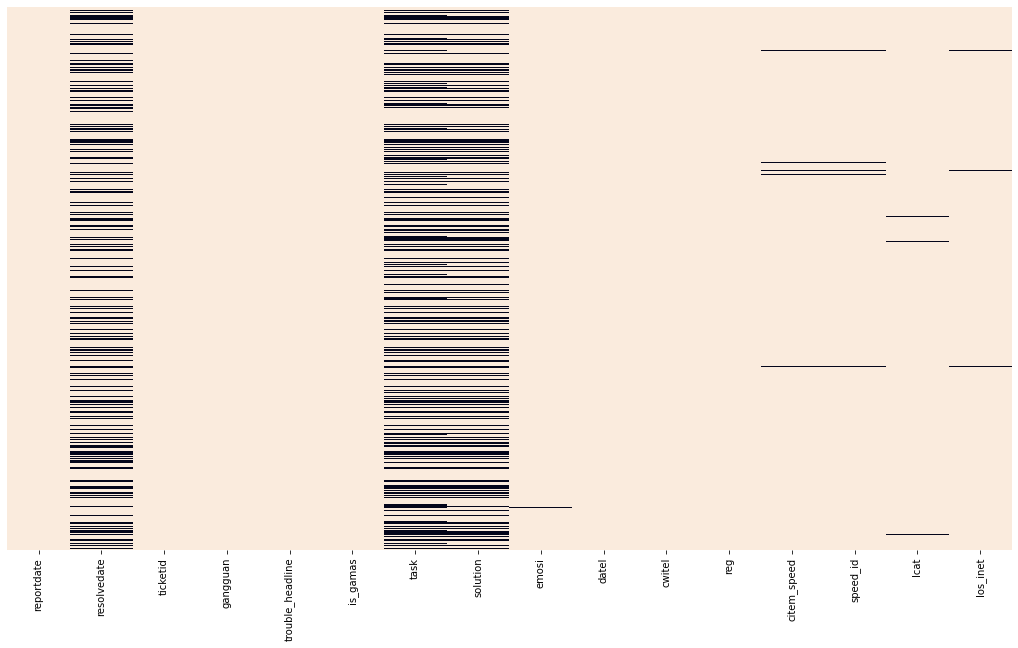

In [12]:
plot_null_matrix(df)

In [16]:
df2 = pd.read_feather('D:/big-datasets/internship-telkom/eda-tiket-no-missing.ftr')
df2

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,0,Ramah,Nunukan,47,6,3M,Residensial,0,2P / 3P Mati Total
1,2021-05-24 14:32:10,1,Ramah,Balikpapan,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi
2,2021-04-04 11:27:17,0,Ramah,Jambi,6,1,10M,Residensial,0,2P / 3P Mati Total
3,2021-06-26 21:09:49,0,Ramah,Kujang,19,2,20M,Prime Cluster,1,Lambat
4,2021-06-15 11:02:32,0,Marah,Blitar,35,5,20M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2632496,2021-01-04 12:21:16,0,Marah,Sumedang,23,3,20M,Prime Cluster,0,2P / 3P Mati Total
2632497,2021-02-18 09:56:08,0,Marah,Nganjuk,35,5,10M,Residensial,1,Lambat
2632498,2021-05-29 08:31:46,0,Ramah,Garut,24,3,20M,Residensial,0,2P / 3P Mati Total
2632499,2021-05-04 08:22:38,0,Marah,Surabaya selatan,38,5,30M,Residensial,1,Lambat


In [17]:
df2['emosi'] = df2['emosi'].mask(df2['emosi'] == 'Agak marah', 'Marah')

In [20]:
def emosi_summary_gangguan(thn, bln, cw):
    ex = df2[(df2['reportdate'].dt.year == thn) & (df2['reportdate'].dt.month == bln) & (df2['cwitel'] == cw)]
    for gangguan in ex['gangguan_v2'].value_counts().head().index:
        ramah_perc = round(ex['emosi'][ex['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
        marah_perc = round(ex['emosi'][ex['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
        text = f'''
        Gangguan: {gangguan}
        Persentase Respon Ramah: {ramah_perc}%
        Persentase Respon Marah: {marah_perc}%
        '''
        yield text

In [67]:
generator = emosi_summary_gangguan(thn=2021, bln=1, cw=16)
for i in generator:
    print(i)


        Gangguan: Tidak Bisa Koneksi
        Persentase Respon Ramah: 69.04%
        Persentase Respon Marah: 30.96%
        

        Gangguan: 2P / 3P Mati Total
        Persentase Respon Ramah: 62.92%
        Persentase Respon Marah: 37.08%
        

        Gangguan: Lambat
        Persentase Respon Ramah: 51.39%
        Persentase Respon Marah: 48.61%
        

        Gangguan: Intermitten / Putus-Putus
        Persentase Respon Ramah: 58.52%
        Persentase Respon Marah: 41.48%
        

        Gangguan: Tidak Bisa ke Website Tertentu
        Persentase Respon Ramah: 70.17%
        Persentase Respon Marah: 29.83%
        


In [33]:
def emosi_summary_jam(thn, bln, cw):
    ex = df2[(df2['reportdate'].dt.year == thn) & (df2['reportdate'].dt.month == bln) & (df2['cwitel'] == cw)]
    # 0-6
    ramah_06 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 0) & (ex['reportdate'].dt.hour < 6)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_06 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 0) & (ex['reportdate'].dt.hour < 6)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    # 6-12
    ramah_612 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 6) & (ex['reportdate'].dt.hour < 12)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_612 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 6) & (ex['reportdate'].dt.hour < 12)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    # 12-18
    ramah_1218 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 12) & (ex['reportdate'].dt.hour < 18)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_1218 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 12) & (ex['reportdate'].dt.hour < 18)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    # 18-23
    ramah_1823 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 18) & (ex['reportdate'].dt.hour <= 23)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_1823 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 18) & (ex['reportdate'].dt.hour <= 23)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']

    # print text
    text = f'''
    Pukul 00:00 - 06:00
    Persentase Respon Ramah: {ramah_06}%
    Persentase Respon Marah: {marah_06}%

    Pukul 06:00 - 12:00
    Persentase Respon Ramah: {ramah_612}%
    Persentase Respon Marah: {marah_612}%

    Pukul 12:00 - 18:00
    Persentase Respon Ramah: {ramah_1218}%
    Persentase Respon Marah: {marah_1218}%

    Pukul 18:00 - 24:00
    Persentase Respon Ramah: {ramah_1823}%
    Persentase Respon Marah: {marah_1823}%
    '''
    yield text

In [47]:
generator = emosi_summary_jam(thn=2021, bln=1, cw=16)
for i in generator:
    print(i)


    Pukul 00:00 - 06:00
    Persentase Respon Ramah: 65.16%
    Persentase Respon Marah: 34.84%

    Pukul 06:00 - 12:00
    Persentase Respon Ramah: 62.87%
    Persentase Respon Marah: 37.13%

    Pukul 12:00 - 18:00
    Persentase Respon Ramah: 61.87%
    Persentase Respon Marah: 38.13%

    Pukul 18:00 - 24:00
    Persentase Respon Ramah: 59.3%
    Persentase Respon Marah: 40.7%
    


In [26]:
hour_marah = {}

for i in range (0, 24):
    if i not in hour_marah:
        hour_marah[i] = len(df2[(df2['emosi'] == 'Marah') & (df2['reportdate'].dt.hour == i)])
    else:
        hour_marah[i] += len(df2[(df2['emosi'] == 'Marah') & (df2['reportdate'].dt.hour == i)])

In [27]:
hour_marah

{0: 11019,
 1: 6937,
 2: 3782,
 3: 3037,
 4: 4209,
 5: 8311,
 6: 18687,
 7: 37681,
 8: 64800,
 9: 77480,
 10: 74108,
 11: 69328,
 12: 61197,
 13: 63483,
 14: 57644,
 15: 52921,
 16: 49976,
 17: 47590,
 18: 45296,
 19: 45911,
 20: 42252,
 21: 35511,
 22: 24797,
 23: 16115}

In [28]:
plot = pd.DataFrame(list(hour_marah.items()), columns = ['hour', 'marah_count'])
plot

,hour,marah_count
0,0,11019
1,1,6937
2,2,3782
3,3,3037
4,4,4209
5,5,8311
6,6,18687
7,7,37681
8,8,64800
9,9,77480


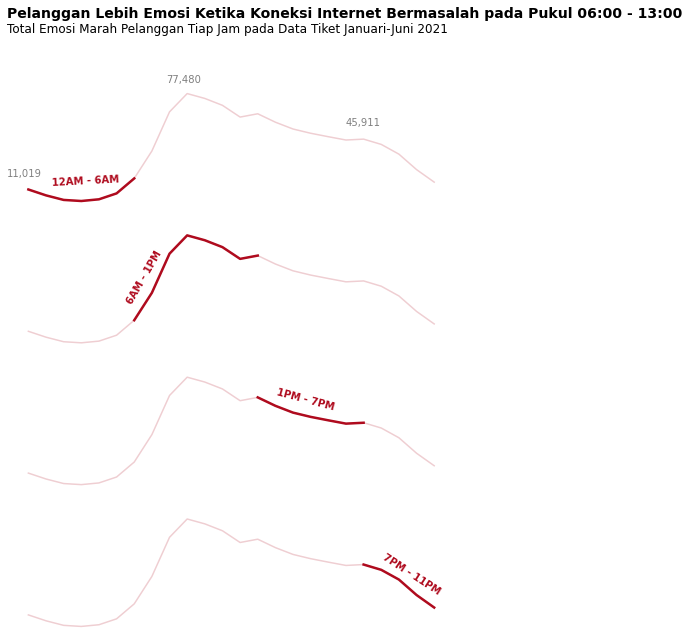

In [30]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8, 10))
for i in range(4):
    ax[i].plot(plot['hour'], plot['marah_count'], color='#af0b1e', alpha=0.2)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].tick_params(bottom=False, left=False)
    
    for loc in ['top', 'right', 'bottom', 'left']:
        ax[i].spines[loc].set_visible(False)


# Title
ax[0].text(x=-1.2, y=130000, s='Pelanggan Lebih Emosi Ketika Koneksi Internet Bermasalah pada Pukul 06:00 - 13:00', size=14, weight='bold')
ax[0].text(x=-1.2, y=120000, s='Total Emosi Marah Pelanggan Tiap Jam pada Data Tiket Januari-Juni 2021', size=12)
        
# Highlight plot
ax[0].plot(plot['hour'][0:7], plot['marah_count'][0:7], color='#af0b1e', linewidth=2.5) # hour 0-6
ax[1].plot(plot['hour'][6:14], plot['marah_count'][6:14], color='#af0b1e', linewidth=2.5) # hour 7-13
ax[2].plot(plot['hour'][13:20], plot['marah_count'][13:20], color='#af0b1e', linewidth=2.5) # hour 13-19
ax[3].plot(plot['hour'][19:24], plot['marah_count'][19:24], color='#af0b1e', linewidth=2.5) # hour 19-23

# Y ticks
ax[0].text(x=-1.2, y=20000, s='11,019', alpha=0.5)
ax[0].text(x=7.8, y=85000, s='77,480', alpha=0.5)
ax[0].text(x=18, y=55000, s='45,911', alpha=0.5)

# X ticks
ax[0].text(x=1.3, y=14000, s='12AM - 6AM', color='#af0b1e', weight='bold', rotation=3)
ax[1].text(x=5.5, y=30000, s='6AM - 1PM', color='#af0b1e', weight='bold', rotation=60)
ax[2].text(x=14, y=55000, s='1PM - 7PM', color='#af0b1e', weight='bold', rotation=-15)
ax[3].text(x=20, y=25000, s='7PM - 11PM', color='#af0b1e', weight='bold', rotation=-33)


plt.show()

In [54]:
df['trouble_headline'].sample(10).to_list()

['[/amrin  /] T1 /  / COM / bp amrin /  / inet tbc lampu inet padam sudah restart nok minta teknisi datang hari ini save darft /   [A_INTERNET][DCS]',
 'NUR CCAN [/Dian/]  tidak bisa koneksi internet [A_INTERNET][DCS]',
 '[ KRG / FTTH / FQ / AGUNG / /BP TAGOR/] T1 /  / COM  / BP TAGOR /  / lapul inet tbc / los merah / kabel oke / BPN / HC  /  [A_INTERNET][DCS]',
 '[/DWI/] T1 /   / COM / DWI /  /  inet lambat signal lemah jarak 3 meter / tiket /  [A_INTERNET][DCS]',
 '[/FIRA/] T1 /  / COM / bu fira /  / inet lambat / restart dr acs /   [A_INTERNET][DCS]',
 '[/BU TATA/] T1 /  / reg / BU RINI /  / case / solusi /  [A_INTERNET][DCS]',
 'dede [/BU ICA/] T1 /  / com / icak/  / indihome matot onu los / edukasi pasang patchord sampai klik / BOK /  [A_INTERNET][DCS]',
 'ttr 3 jam[/ivan   /]  / T1 / COM / ivan /  / gaul inet intermitten /    [A_INTERNET][DCS]',
 'GAMAS  DISTRIBUSI PUTUS[/Wirasutha/] Tidak bisa browsing [A_INTERNET][DCS]',
 'MANJA MAYLIUS [/YULIA/] T1/ / COM/ IBU YULIA/ /3p matot

In [53]:
df[['gangguan', 'trouble_headline']][df['trouble_headline'] == '[/Syahroni Nur Arifin / ] [GANGGUAN][DBS][SOSMED]  TIDAK BISA KONEKSI [A_INTERNET][DBS]']

,gangguan,trouble_headline
145889,Tidak Bisa Browsing - Tidak Bisa Koneksi,[/Syahroni Nur Arifin / ] [GANGGUAN][DBS][SOSM...


In [64]:
string1 = '[/amrin  /] T1 /  / COM / bp amrin /  / inet tbc lampu inet padam sudah restart nok minta teknisi datang hari ini save darft /   [A_INTERNET][DCS]'
string1.split('/')

['[',
 'amrin  ',
 '] T1 ',
 '  ',
 ' COM ',
 ' bp amrin ',
 '  ',
 ' inet tbc lampu inet padam sudah restart nok minta teknisi datang hari ini save darft ',
 '   [A_INTERNET][DCS]']

In [71]:
headlines = df['trouble_headline'].str.lower()

In [72]:
headlines

0           [/ardiansyah/] 2/3p mati total [a_internet][dcs]
1          [/arlianasari/] tidak bisa browsing [a_interne...
2                 [/atok/] 2/3p mati total [a_internet][dcs]
3          [/cahyono/] t1 /  / com / cahyono / / inet lam...
4          [/bapak yudha/] t1 / / com /  bapak yudha / / ...
                                 ...                        
2688758    [manja jam 14] ridwan [/abdullah irsyad ikramu...
2688759    [/ibu sri /] t1 /  / com / ibu sri /  / inet l...
2688760    <b>[ttr3jam-expjam16.00]</b>kdn.yudi.los[/bp o...
2688761    [/dimas surya prata/]  / sosmed / @mumetngodin...
2688762    [/amanda vania kiat/]  / sosmed / falah falah ...
Name: trouble_headline, Length: 2688763, dtype: object

In [73]:
df2

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,0,Ramah,Nunukan,47,6,3M,Residensial,0,2P / 3P Mati Total
1,2021-05-24 14:32:10,1,Ramah,Balikpapan,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi
2,2021-04-04 11:27:17,0,Ramah,Jambi,6,1,10M,Residensial,0,2P / 3P Mati Total
3,2021-06-26 21:09:49,0,Ramah,Kujang,19,2,20M,Prime Cluster,1,Lambat
4,2021-06-15 11:02:32,0,Marah,Blitar,35,5,20M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2632496,2021-01-04 12:21:16,0,Marah,Sumedang,23,3,20M,Prime Cluster,0,2P / 3P Mati Total
2632497,2021-02-18 09:56:08,0,Marah,Nganjuk,35,5,10M,Residensial,1,Lambat
2632498,2021-05-29 08:31:46,0,Ramah,Garut,24,3,20M,Residensial,0,2P / 3P Mati Total
2632499,2021-05-04 08:22:38,0,Marah,Surabaya selatan,38,5,30M,Residensial,1,Lambat


In [82]:
def emosi_summary_gangguan(reg):
    ex = df2[df2['reg'] == reg]
    for gangguan in ex['gangguan_v2'].value_counts().head().index:
        ramah_perc = round(ex['emosi'][ex['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
        marah_perc = round(ex['emosi'][ex['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
        text = f'''
        Gangguan: {gangguan}
        Persentase Respon Ramah: {ramah_perc}%
        Persentase Respon Marah: {marah_perc}%
        '''
        yield text

In [90]:
generator = emosi_summary_gangguan(reg=7)
for i in generator:
    print(i)


        Gangguan: Tidak Bisa Koneksi
        Persentase Respon Ramah: 75.79%
        Persentase Respon Marah: 24.21%
        

        Gangguan: 2P / 3P Mati Total
        Persentase Respon Ramah: 67.55%
        Persentase Respon Marah: 32.45%
        

        Gangguan: Lambat
        Persentase Respon Ramah: 64.56%
        Persentase Respon Marah: 35.44%
        

        Gangguan: Intermitten / Putus-Putus
        Persentase Respon Ramah: 66.37%
        Persentase Respon Marah: 33.63%
        

        Gangguan: Gangguan Game Online
        Persentase Respon Ramah: 88.22%
        Persentase Respon Marah: 11.78%
        


In [79]:
df2['reg'].value_counts().sort_index()

1    351678
2    956240
3    225374
4    270497
5    398349
6    233025
7    197338
Name: reg, dtype: int64

In [91]:
def emosi_summary_jam(reg):
    ex = df2[df2['reg'] == reg]
    # 0-6
    ramah_06 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 0) & (ex['reportdate'].dt.hour < 6)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_06 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 0) & (ex['reportdate'].dt.hour < 6)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    # 6-12
    ramah_612 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 6) & (ex['reportdate'].dt.hour < 12)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_612 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 6) & (ex['reportdate'].dt.hour < 12)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    # 12-18
    ramah_1218 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 12) & (ex['reportdate'].dt.hour < 18)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_1218 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 12) & (ex['reportdate'].dt.hour < 18)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    # 18-23
    ramah_1823 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 18) & (ex['reportdate'].dt.hour <= 23)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_1823 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 18) & (ex['reportdate'].dt.hour <= 23)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']

    # print text
    text = f'''
    Pukul 00:00 - 06:00
    Persentase Respon Ramah: {ramah_06}%
    Persentase Respon Marah: {marah_06}%

    Pukul 06:00 - 12:00
    Persentase Respon Ramah: {ramah_612}%
    Persentase Respon Marah: {marah_612}%

    Pukul 12:00 - 18:00
    Persentase Respon Ramah: {ramah_1218}%
    Persentase Respon Marah: {marah_1218}%

    Pukul 18:00 - 24:00
    Persentase Respon Ramah: {ramah_1823}%
    Persentase Respon Marah: {marah_1823}%
    '''
    yield text

In [98]:
generator = emosi_summary_jam(reg=7)
for i in generator:
    print(i)


    Pukul 00:00 - 06:00
    Persentase Respon Ramah: 70.87%
    Persentase Respon Marah: 29.13%

    Pukul 06:00 - 12:00
    Persentase Respon Ramah: 70.82%
    Persentase Respon Marah: 29.18%

    Pukul 12:00 - 18:00
    Persentase Respon Ramah: 69.6%
    Persentase Respon Marah: 30.4%

    Pukul 18:00 - 24:00
    Persentase Respon Ramah: 68.72%
    Persentase Respon Marah: 31.28%
    


In [100]:
def emosi_summary_gangguan():
    ex = df2.copy()
    for gangguan in ex['gangguan_v2'].value_counts().head().index:
        ramah_perc = round(ex['emosi'][ex['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
        marah_perc = round(ex['emosi'][ex['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
        text = f'''
        Gangguan: {gangguan}
        Persentase Respon Ramah: {ramah_perc}%
        Persentase Respon Marah: {marah_perc}%
        '''
        yield text

In [102]:
generator = emosi_summary_gangguan()
for i in generator:
    print(i)


        Gangguan: Tidak Bisa Koneksi
        Persentase Respon Ramah: 72.74%
        Persentase Respon Marah: 27.26%
        

        Gangguan: 2P / 3P Mati Total
        Persentase Respon Ramah: 63.4%
        Persentase Respon Marah: 36.6%
        

        Gangguan: Lambat
        Persentase Respon Ramah: 57.0%
        Persentase Respon Marah: 43.0%
        

        Gangguan: Intermitten / Putus-Putus
        Persentase Respon Ramah: 59.5%
        Persentase Respon Marah: 40.5%
        

        Gangguan: Gangguan Game Online
        Persentase Respon Ramah: 85.25%
        Persentase Respon Marah: 14.75%
        


In [103]:
def emosi_summary_jam():
    ex = df2.copy()
    # 0-6
    ramah_06 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 0) & (ex['reportdate'].dt.hour < 6)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_06 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 0) & (ex['reportdate'].dt.hour < 6)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    # 6-12
    ramah_612 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 6) & (ex['reportdate'].dt.hour < 12)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_612 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 6) & (ex['reportdate'].dt.hour < 12)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    # 12-18
    ramah_1218 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 12) & (ex['reportdate'].dt.hour < 18)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_1218 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 12) & (ex['reportdate'].dt.hour < 18)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    # 18-23
    ramah_1823 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 18) & (ex['reportdate'].dt.hour <= 23)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_1823 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 18) & (ex['reportdate'].dt.hour <= 23)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']

    # print text
    text = f'''
    Pukul 00:00 - 06:00
    Persentase Respon Ramah: {ramah_06}%
    Persentase Respon Marah: {marah_06}%

    Pukul 06:00 - 12:00
    Persentase Respon Ramah: {ramah_612}%
    Persentase Respon Marah: {marah_612}%

    Pukul 12:00 - 18:00
    Persentase Respon Ramah: {ramah_1218}%
    Persentase Respon Marah: {marah_1218}%

    Pukul 18:00 - 24:00
    Persentase Respon Ramah: {ramah_1823}%
    Persentase Respon Marah: {marah_1823}%
    '''
    yield text

In [104]:
generator = emosi_summary_jam()
for i in generator:
    print(i)


    Pukul 00:00 - 06:00
    Persentase Respon Ramah: 64.67%
    Persentase Respon Marah: 35.33%

    Pukul 06:00 - 12:00
    Persentase Respon Ramah: 65.81%
    Persentase Respon Marah: 34.19%

    Pukul 12:00 - 18:00
    Persentase Respon Ramah: 65.11%
    Persentase Respon Marah: 34.89%

    Pukul 18:00 - 24:00
    Persentase Respon Ramah: 63.34%
    Persentase Respon Marah: 36.66%
    
